<a href="https://colab.research.google.com/github/davitacols/vazzel_ai_doc/blob/main/Vazzel_Gen_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI for Fashion Designs
**Purpose**: Create highly realistic and futuristic fashion designs using diffusion models.  
**Focus**: Clothing, accessories, and innovative aesthetics.  
This notebook utilizes pre-trained Stable Diffusion models to generate photorealistic images based on user-defined prompts.


In [ ]:
!pip install torch torchvision transformers diffusers mediapy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00


Import necessary libraries

In [ ]:
import mediapy as media
import torch
from diffusers import StableDiffusionPipeline
import random
import sys


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

4️⃣ Load the Pre-Trained Model

Download and load the Stable Diffusion pipeline optimized for image generation.

In [ ]:
# Load the Stable Diffusion Model
pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16
).to("cuda")

# Check if the model is loaded
print("Model loaded successfully!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Model loaded successfully!


In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is enabled
print(torch.cuda.get_device_name(0))  # Get the name of the GPU


True
Tesla T4


5️⃣ Define the Fashion Design Generation Function

This function creates a prompt and generates an image.

In [ ]:
def generate_fashion_design(topwear, bottomwear, accessories, body_shape):
    """
    Generates a realistic fashion design based on user inputs, including body shape customization.
    """
    # Create a dynamic and realistic prompt
    prompt = (
        f"Design a photorealistic fashion outfit tailored for a {body_shape} body shape. "
        f"Topwear: {topwear}, suitable for everyday occasions. "
        f"Bottomwear: {bottomwear}, comfortable and stylish. "
        f"Accessories: {accessories}, simple and elegant. "
        "Render this design with natural lighting, realistic textures, "
        "and minimalistic aesthetics. The result should look like a high-quality photo "
        "of clothing displayed on a mannequin or a model in a neutral setting."
    )

    # Generate a random seed
    seed = random.randint(0, sys.maxsize)

    # Generate the image
    images = pipe(
        prompt=prompt,
        guidance_scale=13,  # Balanced guidance scale for normal designs
        num_inference_steps=50,  # Moderate steps for quick results
        generator=torch.Generator("cuda").manual_seed(seed),
    ).images[0]  # Get the first generated image

    # Display the image and prompt details
    print(f"Prompt: {prompt}")
    print(f"Seed: {seed}")

    return images



6️⃣ User Interaction


Collect inputs from the user for garments and accessories.

Enter the type of topwear (e.g., 'casual shirt'): floral blouse
Enter the type of bottomwear (e.g., 'jeans'): A-line skirt
Enter the accessories (e.g., 'wristwatch, necklace'): gold earing
Enter the body shape (e.g., 'hourglass, athletic, pear-shaped'): pear-shaped


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['displayed on a mannequin or a model in a neutral setting .']


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: Design a photorealistic fashion outfit tailored for a pear-shaped body shape. Topwear: floral blouse, suitable for everyday occasions. Bottomwear: A-line skirt, comfortable and stylish. Accessories: gold earing, simple and elegant. Render this design with natural lighting, realistic textures, and minimalistic aesthetics. The result should look like a high-quality photo of clothing displayed on a mannequin or a model in a neutral setting.
Seed: 903096603153696134


""

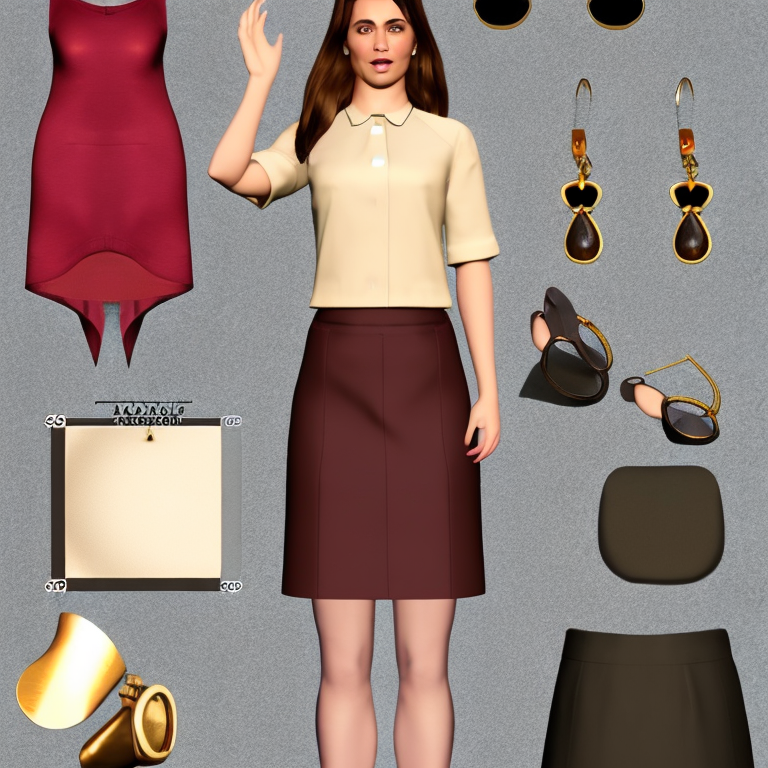

In [ ]:
# Collect user inputs
topwear = input("Enter the type of topwear (e.g., 'casual shirt'): ")
bottomwear = input("Enter the type of bottomwear (e.g., 'jeans'): ")
accessories = input("Enter the accessories (e.g., 'wristwatch, necklace'): ")
body_shape = input("Enter the body shape (e.g., 'hourglass, athletic, pear-shaped'): ")

# Generate the design
output_image = generate_fashion_design(topwear, bottomwear, accessories, body_shape)

# Save and display the image
# Save and display the image
output_image.save("fashion_design.jpg")
media.show_images([output_image])  # Wrap the image in a list


8️⃣ Optional Advanced Section


Add more control to the generation process, such as custom guidance scale and steps.

In [ ]:
def advanced_generation(topwear, bottomwear, accessories, steps=50, guidance=7.5):
    """
    Advanced version with customizable settings for inference steps and guidance scale.
    """
    prompt = (
        f"A photorealistic fashion design featuring {topwear}, {bottomwear}, "
        f"and accessories like {accessories}. Rendered in ultra-HD with intricate details "
        "and cinematic lighting in a futuristic setting."
    )
    seed = random.randint(0, sys.maxsize)
    image = pipe(
        prompt=prompt,
        guidance_scale=guidance,
        num_inference_steps=steps,
        generator=torch.Generator("cuda").manual_seed(seed),
    ).images[0]
    media.show_images([image])
    return image
